# Sentiment Analysis

In [1]:
# import packages
from sklearn import metrics 
import numpy as np 
import pandas as pd 
import glob, os  
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## load and reduce data to 10000 rows, normalize

In [2]:
df = pd.read_csv("./Reviews.csv")

In [3]:
df_sub = df.sample(n=10000, random_state=44)

In [4]:
%run ./Text_Normalization_Function.ipynb

Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

In [5]:
norm_sub = normalize_corpus(df_sub['Text'])

In [ ]:
norm_sub

In [6]:
df_sub['Normalized_Text'] = norm_sub

In [7]:
df_sub.to_csv('Reviews_sub_10000.csv')

## Split data to train and test

In [8]:
import random

In [9]:
random.seed(44)
rand_state = np.random.uniform(low = 0, high = 1, size = int(df_sub.shape[0]))
df_sub['rand'] = rand_state

In [10]:
df_train = df_sub[df_sub['rand'] <= 0.5]
df_test = df_sub[df_sub['rand']>0.5]

In [11]:
print(df_test.shape)
print(df_train.shape)

(4917, 12)
(5083, 12)


In [12]:
df_sub['Score'].unique()

array([5, 2, 4, 3, 1], dtype=int64)

# Set label Ys(Sentiment) for data based on Score

**Two standards for y:<br/> 1. Threshold = 2, Y = "Negative" if Score <=2, Y = "Positive" if Score > 2. <br/> 2. Threshold = 3, Y = "Negative" if Score <= 3, Y = "Positive" if Score > 3.**

In [43]:
y1_tr = ["Negative" if i <=2 else "Positive" for i in list(df_train["Score"])]
y2_tr = ["Negative" if i <=3 else "Positive" for i in list(df_train["Score"])]
y1_te = ["Negative" if i <=2 else "Positive" for i in list(df_test["Score"])]
y2_te = ["Negative" if i <=3 else "Positive" for i in list(df_test["Score"])]

print(y1_tr.count("Positive"))
print(y1_tr.count("Negative"))
print(y2_tr.count("Positive"))
print(y2_tr.count("Negative"))

df_train['Y1'] = y1_tr
df_train['Y2'] = y2_tr
df_test['Y1'] = y1_te
df_test['Y2'] = y2_te


4369
714
3990
1093


D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [44]:
# get X
norm_reviews_train = list(df_train['Normalized_Text'].astype(str))
norm_reviews_test = list(df_test['Normalized_Text'].astype(str))

In [45]:
# TF-IDF (Term Frequency - Inverse Document Frequency) 
vectorizer = TfidfVectorizer(ngram_range = (1,2))   # 2-gram
feature_matrix_TRAIN = vectorizer.fit_transform(norm_reviews_train).astype(float)

vectorizer_alt = TfidfVectorizer(ngram_range = (1,1))   # one grame
feature_matrix_TRAIN_alt = vectorizer_alt.fit_transform(norm_reviews_train).astype(float)

In [46]:
feature_matrix_TRAIN.shape

(5083, 136454)

In [47]:
feature_matrix_TRAIN_names = vectorizer.get_feature_names() 
feature_matrix_TRAIN_table = pd.DataFrame(data = feature_matrix_TRAIN.todense(), 
                                          columns = feature_matrix_TRAIN_names)
feature_matrix_TRAIN_table.head()

,00am,00am 00pm,00pm,00pm est,0g,0g cholesterol,0g polyunsat,0g sodium,0g trans,0lp,...,zukes,zukes company,zukes mini,zukes treat,zumba,zumba class,zwieback,zwieback toast,zzzzzs,zzzzzs large
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
feature_matrix_TEST = vectorizer.transform(norm_reviews_test)
feature_matrix_TEST_alt = vectorizer_alt.transform(norm_reviews_test)

### SVM using Y1

In [49]:
from sklearn import linear_model
sent_analysis_svm = linear_model.SGDClassifier(loss='hinge', random_state = 0) 
sent_analysis_svm.fit(feature_matrix_TRAIN, df_train['Y1'])
predicted_svm = sent_analysis_svm.predict(feature_matrix_TEST)   # 2 gram prediction

sent_analysis_svm_alt = linear_model.SGDClassifier(loss='hinge',random_state = 0) 
sent_analysis_svm_alt.fit(feature_matrix_TRAIN_alt, df_train['Y1'])
predicted_svm_alt = sent_analysis_svm_alt.predict(feature_matrix_TEST_alt)    # 1 gram prediction

In [83]:
sample_ids = [11,13,14,16,17,20] 
for doc_index in sample_ids:
    print('Review:-')
    print(np.array(df_test['Text'])[doc_index])
    print('Actual Labeled Sentiment:', np.array(df_test['Y1'])[doc_index])
    print("Actual Score:", np.array(df_test['Score'])[doc_index])
    print('Predicted Sentiment:', predicted_svm[doc_index])   
    print()

Review:-
At first, I thought my toy schnauzer had gotten into something that made her very sick but I took her off the Newman's Own anyway just to be safe (a decision made by my vet and I after I took her into the ER that night). I decided to try again a few days ago because it appears to be an excellent food (ingredient-wise) and we hadn't pinpointed the specific problem but, yet again, it wasn't even an hour before she was horribly sick and the effects of one feeding have lasted for days (Thank God I have medication left over from our last trip! I'm trying to avoid another vet visit but we're not in the clear yet). Even the stray cats on the block won't touch it and they pretty much eat anything. Definitely won't be trying it again.
Actual Labeled Sentiment: Negative
Actual Score: 1
Predicted Sentiment: Positive

Review:-
I received this for a Christmas present. These are the red licorice ropes of your youth but BEWARE, they were so old and stale as to be inedible and had to throw ou

In [51]:
svm_accuracy = np.round(metrics.accuracy_score(np.array(df_test['Y1']), predicted_svm), 3)
svm_accuracy_alt = np.round(metrics.accuracy_score(np.array(df_test['Y1']), predicted_svm_alt), 3)
delta_test = svm_accuracy - svm_accuracy_alt
print("Accuracy prediction, 2-gram SVM using Y1: ", svm_accuracy)
print("Accuracy prediction, unigram SVM using Y1: ", svm_accuracy_alt)
print("Difference in accuracy prediction: ", delta_test)

Accuracy prediction, 2-gram SVM using Y1:  0.884
Accuracy prediction, unigram SVM using Y1:  0.874
Difference in accuracy prediction:  0.010000000000000009


### SVM using Y2

In [52]:
from sklearn import linear_model
sent_analysis_svm = linear_model.SGDClassifier(loss='hinge', random_state = 0) 
sent_analysis_svm.fit(feature_matrix_TRAIN, df_train['Y2'])
predicted_svm = sent_analysis_svm.predict(feature_matrix_TEST)   # 2 gram prediction

sent_analysis_svm_alt = linear_model.SGDClassifier(loss='hinge',random_state = 0) 
sent_analysis_svm_alt.fit(feature_matrix_TRAIN_alt, df_train['Y2'])
predicted_svm_alt = sent_analysis_svm_alt.predict(feature_matrix_TEST_alt)    # 1 gram prediction

In [53]:
sample_ids = [0,1,2,3,4,5,6,7,8] 
for doc_index in sample_ids:
    print('Review:-')
    print(np.array(df_test['Text'])[doc_index])
    print('Actual Labeled Sentiment:', np.array(df_test['Y2'])[doc_index])
    print("Actual Score:", np.array(df_test['Score'])[doc_index])
    print('Predicted Sentiment:', predicted_svm[doc_index])   
    print()

Review:-
Delicious, not overly cloying sweet, perfectly balanced, good hazelnut flavor, not artificial.  Good concentration.  Husband loves it and since I bought it for him, that's what's important.  I'm not a hazelnut person but even I like it in iced coffee.  Husband likes it in iced and hot.
Actual Labeled Sentiment: Positive
Actual Score: 5
Predicted Sentiment: Positive

Review:-
I bought this product in June and my children and I love it very much! It is so easy and fun to make that, although it isnt what I would call cheap-I do enjoy being able to order from time to time.<br /><br />When I last ordered this product from Amazon, the shipping was free, which is very important to me. If you are going to pay a little more for a product, it is good to be able to compensate by getting free shipping. I was sad to see that as of today, the shipping is $10.58. I just can not afford to pay so much for this product, even though we do love it. I am giving the sushi wraps a solid 5 star ratin

In [54]:
svm_accuracy = np.round(metrics.accuracy_score(np.array(df_test['Y2']), predicted_svm), 3)
svm_accuracy_alt = np.round(metrics.accuracy_score(np.array(df_test['Y2']), predicted_svm_alt), 3)
delta_test = svm_accuracy - svm_accuracy_alt
print("Accuracy prediction, 2-gram SVM using Y2: ", svm_accuracy)
print("Accuracy prediction, unigram SVM using Y2: ", svm_accuracy_alt)
print("Difference in accuracy prediction: ", delta_test)

Accuracy prediction, 2-gram SVM using Y2:  0.847
Accuracy prediction, unigram SVM using Y2:  0.836
Difference in accuracy prediction:  0.01100000000000001


**Comment: looks like Y1 produce better results (accuracy) than Y2, and 2-gram SVM is better than the 1-gram SVM**

### Bootstrapping for model comparison

In [65]:
# set up Y1 again
from sklearn import linear_model
sent_analysis_svm = linear_model.SGDClassifier(loss='hinge', random_state = 0) 
sent_analysis_svm.fit(feature_matrix_TRAIN, df_train['Y1'])
predicted_svm = sent_analysis_svm.predict(feature_matrix_TEST)   # 2 gram prediction

sent_analysis_svm_alt = linear_model.SGDClassifier(loss='hinge',random_state = 0) 
sent_analysis_svm_alt.fit(feature_matrix_TRAIN_alt, df_train['Y1'])
predicted_svm_alt = sent_analysis_svm_alt.predict(feature_matrix_TEST_alt)    # 1 gram prediction

# calculate delta_test
svm_accuracy = np.round(metrics.accuracy_score(np.array(df_test['Y1']), predicted_svm), 3)
svm_accuracy_alt = np.round(metrics.accuracy_score(np.array(df_test['Y1']), predicted_svm_alt), 3)
delta_test = svm_accuracy - svm_accuracy_alt
print("Accuracy prediction, original: ", svm_accuracy)
print("Accuracy prediction, alternative: ", svm_accuracy_alt)
print("Difference in accuracy prediction: ", delta_test)


Accuracy prediction, original:  0.884
Accuracy prediction, alternative:  0.874
Difference in accuracy prediction:  0.010000000000000009


In [66]:
n_iterations = 1000
n_size = 4000
ids = range(4000)
svm_accuracy_boot = list()
svm_accuracy_boot_alt = list()
s = 0

for i in range(n_iterations):
    
    #prepare a pseudo test set
    test_ids = resample(ids, n_samples = n_size)
    actual_sentiments = np.array(df_test['Y1'])[test_ids]
    
    #compute predictions on the pseudo sample
    svm_predicted = sent_analysis_svm.predict(feature_matrix_TEST[test_ids])
    svm_predicted_alt = sent_analysis_svm_alt.predict(feature_matrix_TEST_alt[test_ids])
    
    #compute accuracy for the pseudo sample
    svm_accuracy_boot_iter = metrics.accuracy_score(np.array(df_test['Y1'])[test_ids], svm_predicted)
    svm_accuracy_boot_iter_alt = metrics.accuracy_score(np.array(df_test['Y1'])[test_ids], svm_predicted_alt)

    delta = svm_accuracy_boot_iter - svm_accuracy_boot_iter_alt
    
    if delta > 1.5*delta_test:
        s = s+1
    
    pvalue = float(s)/n_iterations
    
    svm_accuracy_boot.append(svm_accuracy_boot_iter)
    svm_accuracy_boot_alt.append(svm_accuracy_boot_iter_alt)

p-value:  0.026
Mean accuracy for Original Model:  0.885
Mean accuracy for Alternative Model:  0.875


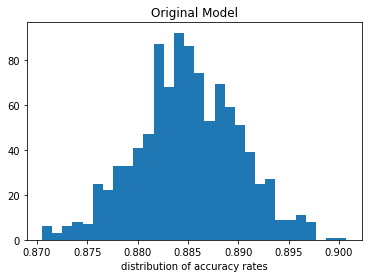

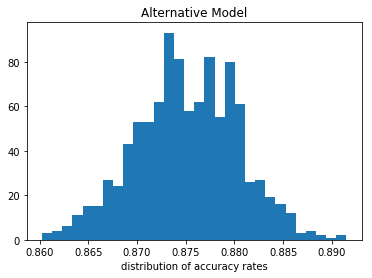

In [67]:
print('p-value: ', pvalue)
print('Mean accuracy for Original Model: ', np.round(np.mean(svm_accuracy_boot),3))
print('Mean accuracy for Alternative Model: ', np.round(np.mean(svm_accuracy_boot_alt),3))


import matplotlib.pyplot as plt

plt.hist(svm_accuracy_boot,bins = 30)
plt.xlabel("distribution of accuracy rates")
plt.title("Original Model")
plt.show()

plt.hist(svm_accuracy_boot_alt,bins = 30)
plt.xlabel("distribution of accuracy rates")
plt.title("Alternative Model")
plt.show()

In [68]:
print(np.mean(svm_accuracy_boot))
print(np.mean(svm_accuracy_boot_alt))

0.8849717500000001
0.87510575


**Comment: P-value suggests the probability to reject the null hypothesis that the original model (2-gram SVM) is no better than the second model (1-gram SVM). As we can see the 2-gram SVM model slightly outperform the 1-gram SVM model. But since we use a delta_test which is really small (delta_test=0.01) and we have a small p-value, there is actually no big difference between the mean accuracy of the first model and the second model. Plots also shows there is no essential difference in the accuracy between 1-gram SVM model and 2-gram SVM model.**

### Try other models: logit, naive bayes

In [69]:
logitmodel = linear_model.SGDClassifier(loss='log')
logitmodel.fit(feature_matrix_TRAIN, df_train['Y1'])
predicted_log = logitmodel.predict(feature_matrix_TEST)

from sklearn.naive_bayes import MultinomialNB

nbmodel = MultinomialNB(alpha=0.1) 
nbmodel.fit(feature_matrix_TRAIN, df_train['Y1'])
predicted_nb = nbmodel.predict(feature_matrix_TEST)

In [70]:
log_accuracy = np.round(metrics.accuracy_score(np.array(df_test['Y1']), predicted_log), 3)
nb_accuracy = np.round(metrics.accuracy_score(np.array(df_test['Y1']), predicted_nb), 3)
delta_test_svm_logit = svm_accuracy - log_accuracy
delta_test_svm_nb = svm_accuracy - nb_accuracy
print("Accuracy prediction, logit: ", log_accuracy)
print("Accuracy prediction, naive bayes: ", nb_accuracy)
print("Difference in accuracy prediction between 2-gram svm vs. 2-gram logit: ", delta_test_svm_logit)
print("Difference in accuracy prediction between 2-gram svm vs. 2-gram naive bayes: ", delta_test_svm_nb)

Accuracy prediction, logit:  0.862
Accuracy prediction, naive bayes:  0.85
Difference in accuracy prediction between 2-gram svm vs. 2-gram logit:  0.02200000000000002
Difference in accuracy prediction between 2-gram svm vs. 2-gram naive bayes:  0.03400000000000003


Two bootstrapping to compare with models:

Compare 2-gram SVM to 2-gram Logit

In [71]:
n_iterations = 1000
n_size = 4000  # training data and test data size are both closed to 5000
ids = range(4000)
svm_accuracy_boot = list()
log_accuracy_boot = list()
s = 0

for i in range(n_iterations):
    
    #prepare a pseudo test set
    test_ids = resample(ids, n_samples = n_size)
    actual_sentiments = np.array(df_test['Y1'])[test_ids]
    
    #compute predictions on the pseudo sample
    svm_predicted = sent_analysis_svm.predict(feature_matrix_TEST[test_ids])
    log_predicted = logitmodel.predict(feature_matrix_TEST[test_ids])
    
    #compute accuracy for the pseudo sample
    svm_accuracy_boot_iter = metrics.accuracy_score(np.array(df_test['Y1'])[test_ids], svm_predicted)
    logit_accuracy_boot_iter = metrics.accuracy_score(np.array(df_test['Y1'])[test_ids], log_predicted)

    delta = svm_accuracy_boot_iter - logit_accuracy_boot_iter
    
    if delta > 1.5*delta_test_svm_logit:
        s = s+1
    
    pvalue = float(s)/n_iterations
    
    svm_accuracy_boot.append(svm_accuracy_boot_iter)
    log_accuracy_boot.append(logit_accuracy_boot_iter)

delta_test:  0.02200000000000002
p-value:  0.0
Mean accuracy for 2-gram SVM Model:  0.885
Mean accuracy for 2-gram Logit Model:  0.865


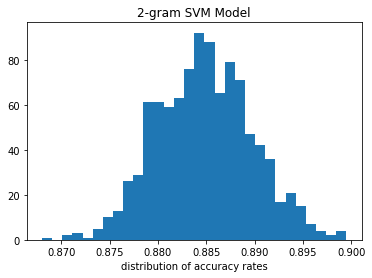

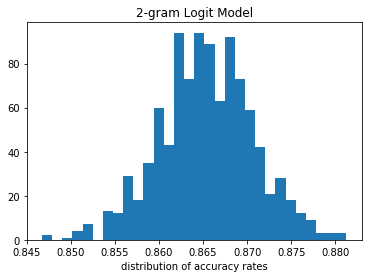

In [72]:
print('delta_test: ', delta_test_svm_logit)
print('p-value: ', pvalue)
print('Mean accuracy for 2-gram SVM Model: ', np.round(np.mean(svm_accuracy_boot),3))
print('Mean accuracy for 2-gram Logit Model: ', np.round(np.mean(log_accuracy_boot),3))


import matplotlib.pyplot as plt

plt.hist(svm_accuracy_boot,bins = 30)
plt.xlabel("distribution of accuracy rates")
plt.title("2-gram SVM Model")
plt.show()

plt.hist(log_accuracy_boot,bins = 30)
plt.xlabel("distribution of accuracy rates")
plt.title("2-gram Logit Model")
plt.show()

Compare 2-gram SVM to 2-gram naive bayes

In [86]:
n_iterations = 1000
n_size = 4000  # training data and test data size are both closed to 5000
ids = range(4000)
svm_accuracy_boot = list()
nb_accuracy_boot = list()
s = 0

for i in range(n_iterations):
    
    #prepare a pseudo test set
    test_ids = resample(ids, n_samples = n_size)
    actual_sentiments = np.array(df_test['Y1'])[test_ids]
    
    #compute predictions on the pseudo sample
    svm_predicted = sent_analysis_svm.predict(feature_matrix_TEST[test_ids])
    nb_predicted = nbmodel.predict(feature_matrix_TEST[test_ids])
    
    #compute accuracy for the pseudo sample
    svm_accuracy_boot_iter = metrics.accuracy_score(np.array(df_test['Y1'])[test_ids], svm_predicted)
    nb_accuracy_boot_iter = metrics.accuracy_score(np.array(df_test['Y1'])[test_ids], nb_predicted)

    delta = svm_accuracy_boot_iter - nb_accuracy_boot_iter
    
    if delta > 1.5*delta_test_svm_nb:
        s = s+1
    
    pvalue = float(s)/n_iterations
    
    svm_accuracy_boot.append(svm_accuracy_boot_iter)
    nb_accuracy_boot.append(nb_accuracy_boot_iter)

delta_test:  0.03400000000000003
p-value:  0.0
Mean accuracy for 2-gram SVM Model:  0.885
Mean accuracy for 2-gram nb Model:  0.853


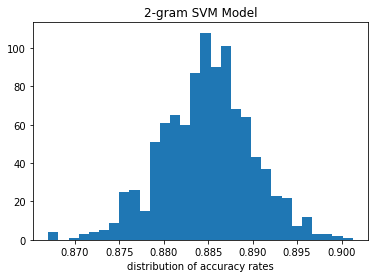

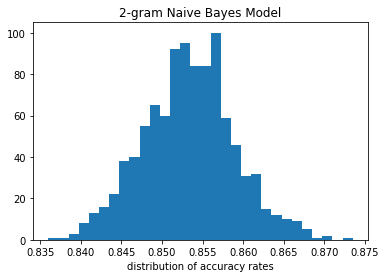

In [87]:
print('delta_test: ', delta_test_svm_nb)
print('p-value: ', pvalue)
print('Mean accuracy for 2-gram SVM Model: ', np.round(np.mean(svm_accuracy_boot),3))
print('Mean accuracy for 2-gram nb Model: ', np.round(np.mean(nb_accuracy_boot),3))


import matplotlib.pyplot as plt

plt.hist(svm_accuracy_boot,bins = 30)
plt.xlabel("distribution of accuracy rates")
plt.title("2-gram SVM Model")
plt.show()

plt.hist(nb_accuracy_boot,bins = 30)
plt.xlabel("distribution of accuracy rates")
plt.title("2-gram Naive Bayes Model")
plt.show()

**Comment: in both bootstrapping tests, p-value are very small. There is not much evidence that 2-gram SVM is better than the logit and Naive bayes models. But the SVM model does appear to slightly outperform Naive bayes and logit model in accuracy score.**

## Some result of SVM, logit model and Naive Bayes model

In [83]:
sample_ids = [11,13,14,16,17,20] 
for doc_index in sample_ids:
    print('Review:-')
    print(np.array(df_test['Text'])[doc_index])
    print('Actual Labeled Sentiment:', np.array(df_test['Y1'])[doc_index])
    print("Actual Score:", np.array(df_test['Score'])[doc_index])
    print('Predicted Sentiment:', predicted_svm[doc_index])   
    print()

Review:-
At first, I thought my toy schnauzer had gotten into something that made her very sick but I took her off the Newman's Own anyway just to be safe (a decision made by my vet and I after I took her into the ER that night). I decided to try again a few days ago because it appears to be an excellent food (ingredient-wise) and we hadn't pinpointed the specific problem but, yet again, it wasn't even an hour before she was horribly sick and the effects of one feeding have lasted for days (Thank God I have medication left over from our last trip! I'm trying to avoid another vet visit but we're not in the clear yet). Even the stray cats on the block won't touch it and they pretty much eat anything. Definitely won't be trying it again.
Actual Labeled Sentiment: Negative
Actual Score: 1
Predicted Sentiment: Positive

Review:-
I received this for a Christmas present. These are the red licorice ropes of your youth but BEWARE, they were so old and stale as to be inedible and had to throw ou

In [84]:
sample_ids = [11,13,14,16,17,20] 
for doc_index in sample_ids:
    print('Review:-')
    print(np.array(df_test['Text'])[doc_index])
    print('Actual Labeled Sentiment:', np.array(df_test['Y1'])[doc_index])
    print("Actual Score:", np.array(df_test['Score'])[doc_index])
    print('Predicted Sentiment:', predicted_log[doc_index])   
    print()

Review:-
At first, I thought my toy schnauzer had gotten into something that made her very sick but I took her off the Newman's Own anyway just to be safe (a decision made by my vet and I after I took her into the ER that night). I decided to try again a few days ago because it appears to be an excellent food (ingredient-wise) and we hadn't pinpointed the specific problem but, yet again, it wasn't even an hour before she was horribly sick and the effects of one feeding have lasted for days (Thank God I have medication left over from our last trip! I'm trying to avoid another vet visit but we're not in the clear yet). Even the stray cats on the block won't touch it and they pretty much eat anything. Definitely won't be trying it again.
Actual Labeled Sentiment: Negative
Actual Score: 1
Predicted Sentiment: Positive

Review:-
I received this for a Christmas present. These are the red licorice ropes of your youth but BEWARE, they were so old and stale as to be inedible and had to throw ou

In [85]:
sample_ids = [11,13,14,16,17,20] 
for doc_index in sample_ids:
    print('Review:-')
    print(np.array(df_test['Text'])[doc_index])
    print('Actual Labeled Sentiment:', np.array(df_test['Y1'])[doc_index])
    print("Actual Score:", np.array(df_test['Score'])[doc_index])
    print('Predicted Sentiment:', predicted_nb[doc_index])   
    print()

Review:-
At first, I thought my toy schnauzer had gotten into something that made her very sick but I took her off the Newman's Own anyway just to be safe (a decision made by my vet and I after I took her into the ER that night). I decided to try again a few days ago because it appears to be an excellent food (ingredient-wise) and we hadn't pinpointed the specific problem but, yet again, it wasn't even an hour before she was horribly sick and the effects of one feeding have lasted for days (Thank God I have medication left over from our last trip! I'm trying to avoid another vet visit but we're not in the clear yet). Even the stray cats on the block won't touch it and they pretty much eat anything. Definitely won't be trying it again.
Actual Labeled Sentiment: Negative
Actual Score: 1
Predicted Sentiment: Positive

Review:-
I received this for a Christmas present. These are the red licorice ropes of your youth but BEWARE, they were so old and stale as to be inedible and had to throw ou